In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
data=pd.read_csv('./breast cancer.csv')

In [67]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [68]:
data.shape

(569, 33)

In [69]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [70]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.rename(columns={"diagnosis":"target"},inplace=True)

In [71]:
items=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
max=[]
for i in items:
    max.append(data[i].describe()['max'])
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [72]:
data.iloc[0][items].values

array([17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471,
       0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904,
       0.05372999999999999, 0.01587, 0.03003, 0.006193, 25.38, 17.33,
       184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189],
      dtype=object)

In [73]:
data.head(3)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


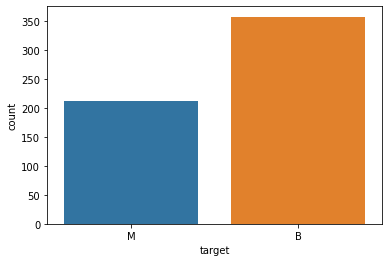

In [75]:
sns.countplot(data.target);
data.target.replace({"M":1,"B":0},inplace=True)

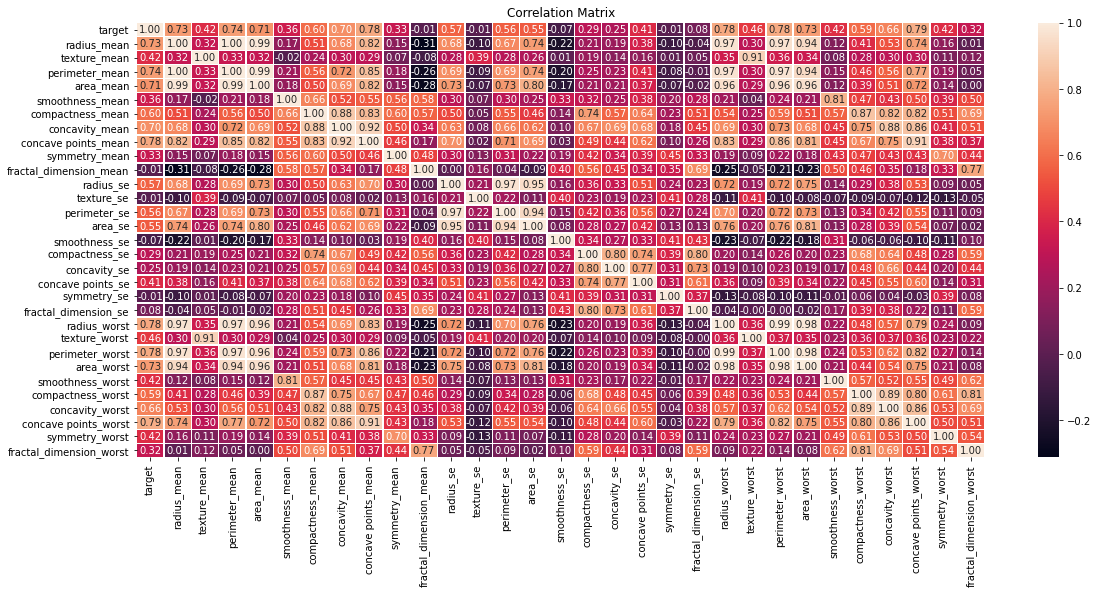

In [76]:
# Correlation
plt.figure(figsize=(19,8))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,fmt=".2f")
plt.title("Correlation Matrix");

<AxesSubplot:>

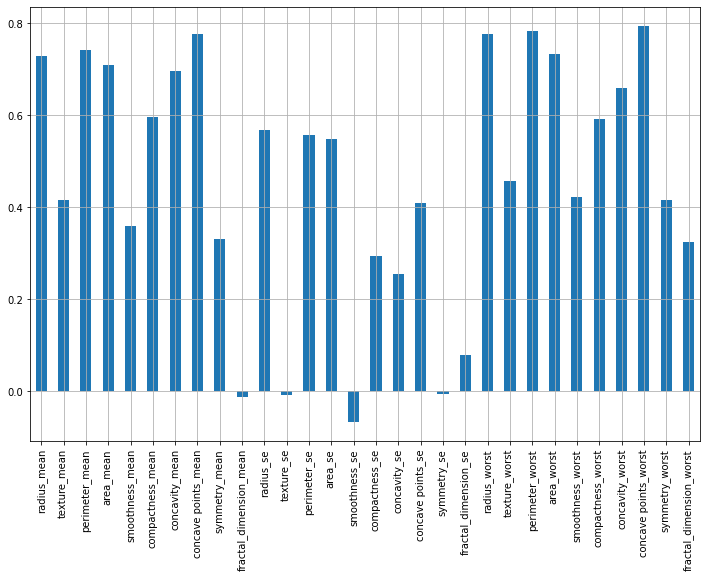

In [77]:
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(12, 8))

In [78]:
# column_not_worth=['fractal_dimension_mean','texture_se','symmetry_se']

In [79]:
# data.drop(columns=column_not_worth,axis=1,inplace=True)

array([[<AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'

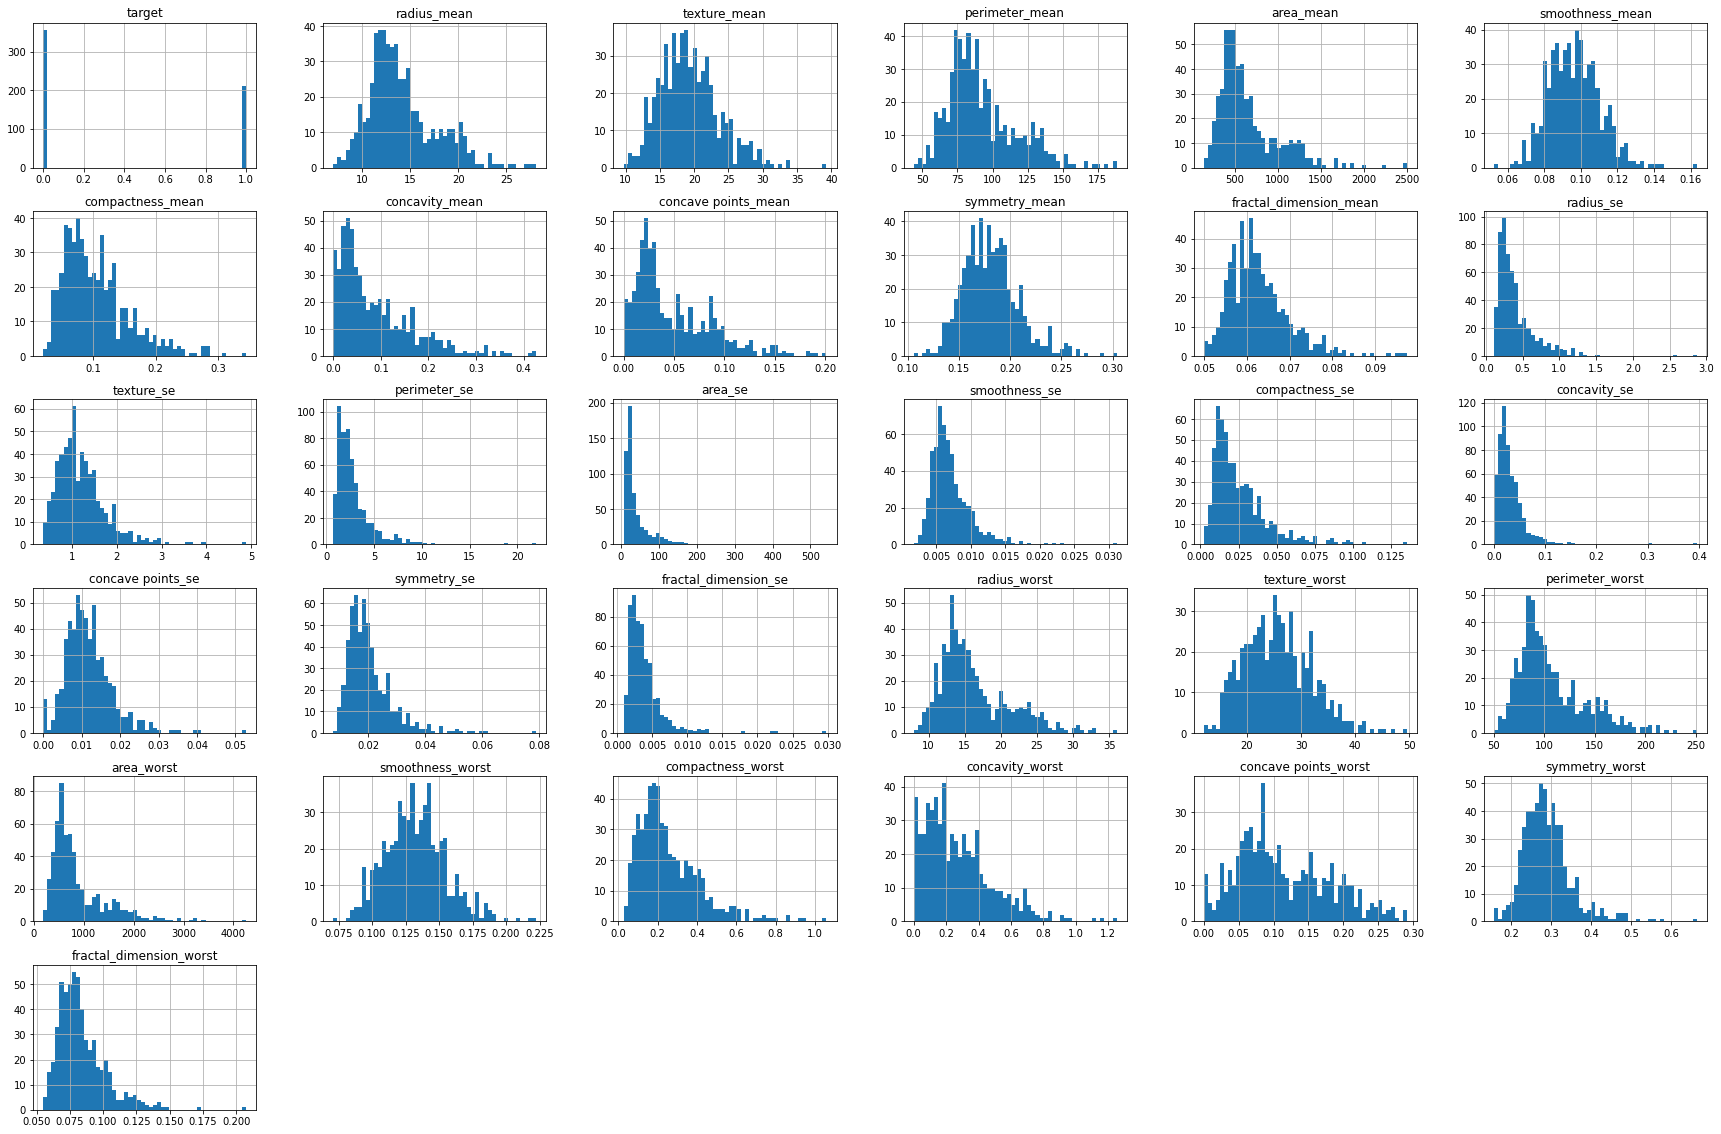

In [80]:
data.hist(bins = 50, figsize=(30,20))

In [81]:
data

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [83]:
y=data["target"]
X=data.drop(["target"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [84]:
class evaluate_all_model:
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.naive_bayes import CategoricalNB
    from sklearn.cluster import KMeans
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.preprocessing import StandardScaler
    from xgboost import XGBClassifier
    import time
    def __init__(self,x,y):
        self.x=x
        self.y=y
        self.train_test_split()
        self.define_models()
        self.evaluate_model()
        print("best model base on Accuracy")
        print(self.best_model)
        
    def train_test_split(self):
        self.X_train, self.X_test, self.y_train,self.y_test =train_test_split(self.x, self.y,test_size=0.33, random_state=5)
        sc=self.StandardScaler()
        self.X_train = sc.fit_transform(self.X_train)
        self.X_test = sc.transform(self.X_test)
    def define_models(self):
        self.models={'LogisticRegression': self.LogisticRegression(),
    'RandomForestClassifier': self.RandomForestClassifier(),
     'KNeighborsClassifier': self.KNeighborsClassifier(),
    'DecisionTreeClassifier': self.DecisionTreeClassifier(),
    'SupportVectorMachine':self.SVC(),
    'GaussianNB': self.GaussianNB(),
    'BernoulliNB': self.BernoulliNB(),
    'GradientBoostingClassifier': self.GradientBoostingClassifier()
                    }
        
        self.modelNames =['LogisticRegression', 'RandomForestClassifier','KNeighborsClassifier','DecisionTreeClassifier','SupportVectorMachine',
                         'GaussianNB','BernoulliNB','GradientBoostingClassifier']
        self.trainScores = []
        self.testScores = []
        self.Time_taken=[]
        self.best_model_score=0
        self.best_model={}
        self.less_time=123
        
        
    def evaluate_model(self):
        for i in self.models:
            start = self.time.time()
            
            model=self.models[i]
            model.fit(self.X_train,self.y_train)
            train_score = model.score(self.X_train, self.y_train)
            self.trainScores.append(train_score)
            print(f'Model:- {i}')
            print(f'training score:- {train_score}')
            test_score = model.score(self.X_test, self.y_test)
            self.testScores.append(test_score)
            print(f'test Score:- {test_score}')
            
            y_predictions = model.predict(self.X_test)
            conf_matrix = confusion_matrix(y_predictions, self.y_test)
            print(f'Confussion Matrix: \n{conf_matrix}\n')
            
            tn = conf_matrix[0,0]
            fp = conf_matrix[0,1]
            tp = conf_matrix[1,1]
            fn = conf_matrix[1,0]
            accuracy  = (tp + tn) / (tp + fp + tn + fn)
            precision = tp / (tp + fp)
            recall    = tp / (tp + fn)
            f1score  = 2 * precision * recall / (precision + recall)
            specificity = tn / (tn + fp)
            print(f'Accuracy : {accuracy}')
            print(f'Precision: {precision}')
            print(f'Recall   : {recall}')
            print(f'F1 score : {f1score}')
            print(f'Specificity : {specificity}')

            end = self.time.time()
            time_taken=end-start
            self.Time_taken.append(time_taken)
            print(f'Time required {end-start}')
            print("***************************************************************************")
            print("____________________________________________________________________________")
            print("\n\n\n")
            if(float(test_score)>self.best_model_score):
                self.best_model["model Name"]=i
                self.best_model["Time Required on train and test"]=time_taken
                self.best_model["Accuracy on train data"]=train_score
                self.best_model["Accuracy on test data"]=accuracy
                self.best_model_score=test_score
                
            if(time_taken<self.less_time):
                self.less_time=time_taken
    def plot_bar(self):
        plt.bar(np.arange(len(self.trainScores)), self.trainScores, color='blue', width=0.25, edgecolor='white', label='train')
        plt.bar([x + 0.25 for x in np.arange(len(self.trainScores))], self.testScores, color='red', width=0.25, edgecolor='white', label='Test')
        plt.xlabel('Models', fontweight='bold', size = 24)
        plt.ylabel('Scores', fontweight='bold', size = 24)
        plt.xticks([r-0.25 for r in range(len(self.trainScores))], self.modelNames, rotation = 60)
        plt.legend()
        plt.show()
    def get_data(self):
        self.temp_dict={}
        self.temp_dict["Model"]=self.modelNames
        self.temp_dict["Training Score"]=self.trainScores
        self.temp_dict["Accuracy on Test"]=self.testScores
        self.temp_dict["Time Taken"]=self.Time_taken
        return self.temp_dict   
    def get_dataframe(self):
        return pd.DataFrame.from_dict(at.get_data()) 
            

In [85]:
at=evaluate_all_model(X,y)

Model:- LogisticRegression
training score:- 0.989501312335958
test Score:- 0.9840425531914894
Confussion Matrix: 
[[121   2]
 [  1  64]]

Accuracy : 0.9840425531914894
Precision: 0.9696969696969697
Recall   : 0.9846153846153847
F1 score : 0.9770992366412214
Specificity : 0.983739837398374
Time required 0.4323601722717285
***************************************************************************
____________________________________________________________________________




Model:- RandomForestClassifier
training score:- 1.0
test Score:- 0.973404255319149
Confussion Matrix: 
[[120   3]
 [  2  63]]

Accuracy : 0.973404255319149
Precision: 0.9545454545454546
Recall   : 0.9692307692307692
F1 score : 0.9618320610687022
Specificity : 0.975609756097561
Time required 1.0918114185333252
***************************************************************************
____________________________________________________________________________




Model:- KNeighborsClassifier
training score:- 0.9816

In [86]:
at.get_dataframe()

,Model,Training Score,Accuracy on Test,Time Taken
0,LogisticRegression,0.989501,0.984043,0.432360
1,RandomForestClassifier,1.000000,0.973404,1.091811
2,KNeighborsClassifier,0.981627,0.957447,0.119987
3,DecisionTreeClassifier,1.000000,0.925532,0.024004
4,SupportVectorMachine,0.984252,0.984043,0.294487
5,GaussianNB,0.926509,0.930851,0.010538
6,BernoulliNB,0.923885,0.962766,0.028153
7,GradientBoostingClassifier,1.000000,0.973404,0.828474


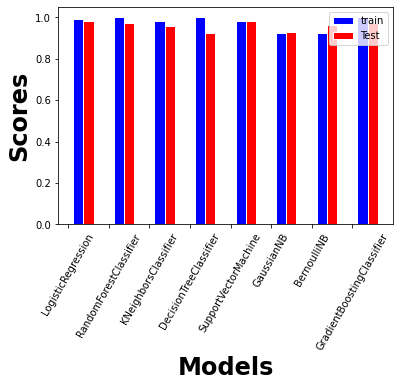

In [87]:
at.plot_bar()

In [90]:
from sklearn.linear_model import LogisticRegression


In [91]:
model=LogisticRegression()

In [93]:
X_train, X_test, y_train,y_test =train_test_split(X, y,test_size=0.33, random_state=5)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [115]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9840425531914894

In [113]:
import pickle
pickle.dump(model, open('Breast_cancer_model', 'wb'))
pickle.dump(sc, open('Breast_cancer_standard_scaler', 'wb'))